In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


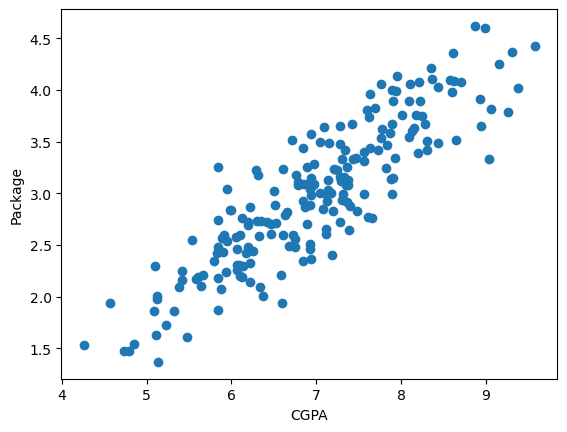

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [4]:
X=df['cgpa']
y=df['package']
          
print(X)
print(y)

0      6.89
1      5.12
2      7.82
3      7.42
4      6.94
       ... 
195    6.93
196    5.89
197    7.21
198    7.63
199    6.22
Name: cgpa, Length: 200, dtype: float64
0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [5]:
def prediction(X,w,b):
    m=len(X)
    predicted_value=np.zeros(m)
    for i in range(m):
        predicted_value[i]=w*X[i]+b
    return predicted_value


In [6]:
w=0
b=1.5
y_hat=prediction(X,w,b)
y_hat

array([1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.

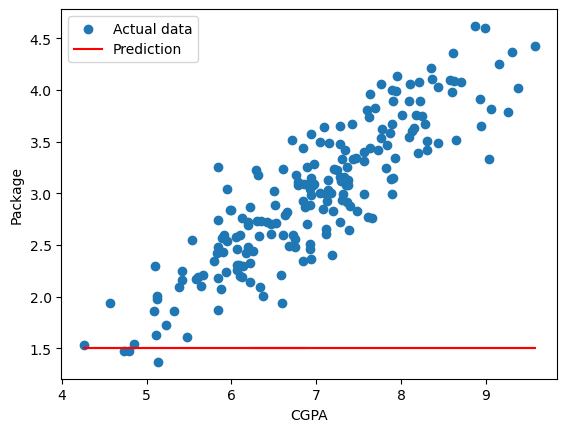

In [7]:
plt.scatter(X, y, label="Actual data")  # Scatter plot of actual data
plt.plot(X, y_hat, color="red", label="Prediction")  # Line plot of predictions
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.legend()  # Show legend
plt.show()


In [8]:
def cost(X,y,w,b):
    m = X.shape[0] 
    cost_sum = 0 
    for i in range(m): 
        f_wb=w*X[i]+b
        cost_sum=cost_sum+(f_wb-y[i])**2
    total_cost=1/(2*m)*cost_sum
    
    return total_cost

In [9]:
w=0
b=1.5
cost(X,y,w,b)


1.357072750000001

In [10]:
def cost_and_pre(y_hat,y):
    m = y.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        cost_sum=cost_sum+(y_hat[i]-y[i])**2
    total_cost=1/(2*m)*cost_sum
    
    return total_cost

In [11]:
def cost_by_numpy(X,y,w,b):
    return 1/(2*len(X))*np.sum(((np.dot(X,w)+b)-y)**2)

In [12]:
def cost_by_mean(X,y,w,b):
    return np.mean(((np.dot(X,w)+b)-y)**2)
cost=cost_by_numpy(X,y,w,b)

In [13]:
cost

1.35707275

In [14]:
print(cost_and_pre(y_hat,y))

1.357072750000001


In [15]:
print(cost_by_numpy(X,y,w,b))

1.35707275


In [16]:
print(cost_by_mean(X,y,w,b))

2.7141454999999994


In [17]:

def gradient_descent(X,y):
    m=len(X)
    w=np.random.randn()
    b=np.random.randn()
    cost_list=[]
    parameter_list=[]
    alpha=0.01
    iteration=100
    for i in range(iteration):
        y_hat=prediction(X,w,b)
        cost=cost_by_numpy(X,y,w,b)
        cost_list.append(cost)
        dw=1/(m)*np.dot(X,(y_hat-y))
        db=1/(m)*np.sum(y_hat-y)
        w-=alpha*dw
        b-=alpha*db
        parameter_list.append([w,b])
    return (parameter_list,cost_list)

In [18]:
parameter_list,cost_list=gradient_descent(X,y)

In [19]:
cost_list

[87.28582082937683,
 21.055239191616238,
 5.142018615147617,
 1.3185349991562323,
 0.3998487933313457,
 0.17909738124437483,
 0.12603855703871045,
 0.11327118809060277,
 0.11018464322799418,
 0.10942411545804426,
 0.1092224675503708,
 0.10915510997936063,
 0.10912002674579224,
 0.10909270649296865,
 0.1090672598809482,
 0.10904227187606098,
 0.10901740248483817,
 0.10899257001339281,
 0.10896775482940133,
 0.10894295221205447,
 0.10891816102332982,
 0.10889338098604168,
 0.10886861202983894,
 0.10884385413406836,
 0.10881910729001916,
 0.10879437149185173,
 0.10876964673441791,
 0.10874493301273741,
 0.1087202303218719,
 0.10869553865689485,
 0.10867085801288419,
 0.10864618838492059,
 0.10862152976808707,
 0.1085968821574689,
 0.10857224554815349,
 0.1085476199352305,
 0.10852300531379178,
 0.1084984016789313,
 0.10847380902574529,
 0.10844922734933216,
 0.10842465664479249,
 0.10840009690722907,
 0.10837554813174687,
 0.10835101031345298,
 0.10832648344745678,
 0.10830196752886977,
 

In [20]:
import numpy as np

# Define the prediction function
def prediction(X, w, b):
    return w * X + b

# Define the cost function (Mean Squared Error)
def cost_by_numpy(y_hat, y):
    return np.mean((y_hat - y) ** 2)

# Define the gradient descent function
def gradient_descent(X, y):
    m = len(X)
    w = np.random.randn()
    b = np.random.randn()
    cost_list = []
    parameter_list = []
    alpha = 0.01
    iterations = 100

    for i in range(iterations):
        y_hat = prediction(X, w, b)
        
        # Calculate gradients
        dw = (2/m) * np.dot(X.T, (y_hat - y))
        db = (2/m) * np.sum(y_hat - y)
        
        # Update weights and bias
        w -= alpha * dw
        b -= alpha * db
        
        # Calculate cost
        cost = cost_by_numpy(y_hat, y)
        
        # Store the cost and parameters for each iteration
        cost_list.append(cost)
        parameter_list.append([w, b])
    
    return parameter_list, cost_list


In [21]:
parameter_list,cost_list=gradient_descent(X,y)

In [22]:
cost_list

[1.8420006848856016,
 0.11362463462183921,
 0.11295152256391945,
 0.11294577480024111,
 0.11294028971751244,
 0.11293480963018421,
 0.11292933443435199,
 0.11292386412561133,
 0.1129183986996,
 0.11291293815195975,
 0.11290748247833621,
 0.11290203167437893,
 0.11289658573574127,
 0.11289114465808048,
 0.11288570843705777,
 0.11288027706833816,
 0.11287485054759049,
 0.11286942887048758,
 0.112864012032706,
 0.11285860002992631,
 0.11285319285783281,
 0.11284779051211363,
 0.11284239298846088,
 0.1128370002825704,
 0.11283161239014194,
 0.1128262293068791,
 0.11282085102848921,
 0.11281547755068352,
 0.11281010886917713,
 0.1128047449796889,
 0.11279938587794149,
 0.11279403155966149,
 0.11278868202057918,
 0.11278333725642875,
 0.11277799726294813,
 0.11277266203587906,
 0.11276733157096717,
 0.11276200586396175,
 0.11275668491061598,
 0.11275136870668682,
 0.11274605724793497,
 0.11274075053012496,
 0.11273544854902508,
 0.1127301513004074,
 0.11272485878004776,
 0.11271957098372576,